# Customer Segmentation 

Business Objective
A company has asked its data science team to segment its customer base in order to help targeted marketing and understand their buying habits.
Data Understanding
The dataset resembles a real dataset and has many of the same challenges.
Objectives:
+ The first step for this project is to import the dataset and create three data frames
+ Customer
+ Products
+ Orders
+ Insert the three data frames in a SQLite database
+ Import the tables from the database and merge them into a single data frame
+ Segment the customers using KMeans and highlight the characteristics of the segments
+ Selection of number of customers segments should be justified
+ Create RFM table ( Recency, Frequency and Money)


In [49]:
#importing required packages
import pandas as pd
import warnings
import sqlite3
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
pio.templates.default = "plotly_white"
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [50]:
#importing data
df = pd.read_csv("PBL5recommendationdata.csv", encoding="latin-1")

# EDA - Explorary Data Analysis

In [51]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [52]:
df.describe()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.purchase_order,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,...,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.vendor,Products.import_id,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_type,Products.amazon_price,Products.google_adwords,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.websites,Products.audio,Products.seo_footer,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.markup,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
count,4194.000000,4.194000e+03,101.0,2114.000000,0.0,5.000000,3.000000,0.0,0.0,0.0,4.194000e+03,3771.000000,4194.000000,4194.000000,82.000000,5.000000e+00,0.0,4194.000000,3737.000000,3999.000000,882.000000,882.000000,0.0,0.0,278.000000,364.000000,4194.000000,351.000000,0.0,0.0,3.000000,4189.000000,4.176000e+03,4176.000000,0.0,0.0,4194.000000,4.194000e+03,4.171000e+03,3.848000e+03,0.0,0.0,0.0,0.0,1.0,96.000000,4011.000000,4194.000000,4194.000000,4151.000000,...,0.0,1008.000000,4037.000000,4037.000000,0.0,4037.000000,4037.000000,0.0,4017.000000,4036.000000,1160.000000,4037.000000,2987.000000,1239.000000,0.0,4.037000e+03,2959.000000,3.130000e+03,3917.000000,0.0,592.000000,0.0,2334.0,2334.0,3.728000e+03,0.0,0.0,0.0,0.0,0.0,2837.0,998.000000,996.000000,996.000000,2.127000e+03,2638.000000,0.0,2920.000000,2786.000000,122.000000,2080.000000,0.0,3998.000000,3998.000000,3998.000000,659.000000,387.000000,0.0,3930.000000,0.0
mean,1796.518121,1.440971e+09,0.0,0.979659,NaN,0.200000,7.333333,NaN,NaN,NaN,1.450401e+09,0.137364,9142.984025,1796.518121,7389.158537,6.018061e+08,NaN,131.925196,0.800838,7.141263,20.403628,9.972676,NaN,NaN,14.752590,13.086676,137.192818,47.981396,NaN,NaN,18.000000,2.958940,1.443104e+09,134.842263,NaN,NaN,1.326180,1.443054e+09,1.449607e+09,1.442167e+09,NaN,NaN,NaN,NaN,1.0,0.010417,0.124159,11156.068670,9142.984025,4451.426162,...,NaN,1.916667,4518.398068,0.987119,NaN,1.629676,3.400297,NaN,121.683321,74.266043,70.754095,52.318192,9549.464680,5.811138,NaN,1.462428e+09,0.940858,2.865179e+13,61.543528,NaN,89.727855,NaN,199.0,22005.0,1.450329e+09,NaN,NaN,NaN,NaN,NaN,0.0,21.292014,19.191185,13.587992,5.504591e+11,162.885140,NaN,0.166438,65.059943,181.696967,0.064423,NaN,17.208216,10.872750,11.592447,15.487041,3.863049,NaN,0.876336,NaN
std,1065.679090,1.887681e+07,0.0,0.141196,NaN,0.447214,0.577350,NaN,NaN,NaN,1.021334e+07,0.391842,5276.541078,1065.679090,3818.085460,1.342831e+09,NaN,231.156869,4.859280,4.531500,11.850291,14.617203,NaN,NaN,32.755244,51.296654,222.898475,209.843126,NaN,NaN,6.928203,0.312482,1.809258e+0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [54]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [55]:
df.sample(10)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
1129,944,Karen,Ber,NaN,1430060615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762696,0.0,4083,944,Karen,Ber,NaN,4083,NaN,NaN,NaN,USD,NaN,39.99,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.99,NaN,manual,-1|Free Shipping,NaN,NaN,NaN,1ZF11Y490394036430,3.0,1.430061e+09,NaN,authorize.net,NaN,...,NaN,shower chair; chair for showers; shower chairs...,NaN,NaN,Bathroom-Safety-Shower-Tub-Bench-Chair-with-Ba...,0.0,EA,NaN,NaN,NaN,19.5,19.5,28.0,No,Not Made With Natura,8.223830e+11,NaN,NaN,NaN,NaN,E0240,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Limited Lifetime,1.0,NaN,Universal,Basic Assembly Required,No Installation Required,22.60,14.20,6.80,9.3,Ships Same Day,NaN,NaN,With Back,NaN,NaN,NaN,NaN,NaN,BS1,0.0,NaN
1434,1190,ruth,kantrowitz,Company108,1435076865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764420,0.0,4630,1190,ruth,kantrowitz,Company108,4630,NaN,NaN,NaN,USD,NaN,1043.75,0.0,0.00,12.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,1013.75,0.0,manual,-1|Free Shipping,NaN,NaN,NaN,USFHOLLAND - 10424947328,3.0,1.435077e+09,NaN,authorize.net,NaN,...,NaN,wheelchair; wheelchairs; manual wheelchair; ba...,NaN,NaN,Deluxe-Sentra-Heavy-Duty-Extra-Extra-Wide-Whee...,NaN,EA,NaN,NaN,NaN,47.0,39.0,38.0,No,Not Made With Natura,8.223840e+11,NaN,NaN,NaN,NaN,k0007,NaN,NaN,NaN,NaN,8.0,NaN,NaN,Limited Lifetime,0.0,NaN,Bariatric,Basic Assembly Required,No Installation Required,41.00,35.00,15.00,107.0,Ships Same Day,NaN,NaN,Detachable Full Arms and Swing Away Foot Rests,"30"" Seat",NaN,NaN,NaN,NaN,WC49,0.0,NaN
3251,2786,J T,Sterk,NaN,1457626857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1457626857,NaN,13965,2786,J T,Sterk,NaN,13965,NaN,NaN,NaN,USD,NaN,397.80,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407.75,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,6.63949E+11,3.0,1.457627e+09,abe,authorize.net,NaN,...,NaN,NaN,NaN,NaN,CanDoreg-Positioning-Wedge-Foam-with-vinyl-cov...,NaN,EA,NaN,NaN,NaN,24.0,28.0,12.0,NaN,Soft,7.149050e+11,NaN,NaN,http://www.fab-ent.com/media/32_2015_Catalog/F...,FEI-CATALOG-2015-86.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.00,28.00,12.00,NaN,3 days,NaN,NaN,NaN,"24"" x 28"" x 12""",NaN,NaN,

In [56]:
df.shape

(4194, 181)

# Feature Engineering

In [57]:
# fill null Customers.customer_type  with mode
df['Customers.customer_type'].fillna(df['Customers.customer_type'].mode()[0], inplace=True)
df['Customers.customer_type'] = df['Customers.customer_type'].astype('int64')
 

In [58]:
df = df.dropna(subset=['Products.id'])
df = df.dropna(subset=['Orders.placed_date'])
df = df.dropna(subset=['Orders.payment_status'])

In [59]:
df['Orders.placed_date'] = pd.to_datetime(df['Orders.placed_date'], unit='s')
df['Orders.placed_date'] = df['Orders.placed_date'].dt.date

# Saving the data to a sqlite database

In [60]:
# ı got sqlite codes from my friend github:zafermesutbilen
customers_columns = [col for col in df.columns if col.startswith('Customers')]
orders_columns = [col for col in df.columns if col.startswith('Orders') or col.startswith('Order_Items')]
products_columns = [col for col in df.columns if col.startswith('Products')]

In [61]:
customers_df = df[customers_columns]
orders_df = df[orders_columns]
products_df = df[products_columns]

In [62]:

customers_df.columns = customers_df.columns.str.replace('^Customers\.', '', regex=True)
orders_df.columns = orders_df.columns.str.replace('^Orders\.', '', regex=True)
orders_df.columns = orders_df.columns.str.replace('^Order_Items\.', 'item_', regex=True)
products_df.columns = products_df.columns.str.replace('^Products\.', '', regex=True)

In [63]:
orders_df.head()

,id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,sales_rep,subtotal,tax,shipping,coupon_id,coupon_amount,gift_id,gift_amount,fee_name,fee_amount,discount_name,discount_amount,total,balance_due,shipping_carrier,shipping_method,shipping_trans,shipping_flags,weight,tracking,payment_status,payment_date,payment_user,payment_type,payment_method,payment_amount,purchase_order,payment_id,payment_code,payment_ref,status,placed_date,updated_date,shipped_date,comments,notes,registry_id,gift_message,website,mailing,flags,partial_ship,customer_type,item_id,item_parent,item_product_id,item_product_name,item_attributes,item_attribute_names,item_attribute_prices,item_qty,item_price,item_cost,item_registry_item,item_related_id,item_reorder_frequency,item_account_id,item_flags
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,2015-03-10,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5284,3758,2310.0,"Basic Rollators, Green",NaN,NaN,NaN,1,57.20,44.00,NaN,NaN,NaN,NaN,NaN
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,29.99,NaN,0,0,NaN,1,2013-12-03,1.440529e+09,1.386103e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,31,23,177.0,"Urinary Drain Bags,0.000",NaN,NaN,NaN,4,5.00,1.87,NaN,NaN,NaN,NaN,2.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,78.73,NaN,0,0,NaN,3,2015-12-08,1.450213e+09,NaN,test order,Test,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,NaN,NaN,1,68.78,52.50,NaN,NaN,NaN,NaN,NaN
3,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,29.55,NaN,NaN,NaN,NaN,1,2013-12-11,1.440529e+09,1.386800e+09,ebay order\rpaid by pay pal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1816,29,983.0,Basket for 2-Button Walkers,NaN,NaN,NaN,1,19.56,12.62,NaN,NaN,NaN,NaN,NaN
4,30,5,Abraham,Pollak,Company3,30,NaN,NaN,NaN,USD,NaN,36.05,NaN,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.00,NaN,fedex,11|Ground,NaN,NaN,NaN,6.87398E+14,3.0,1.386862e+09,NaN,NaN,Credit Card,46.00,NaN,NaN,NaN,NaN,1,2013-12-12,1.440529e+09,1.386876e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40,30,991.0,Tens Units,NaN,NaN,NaN,1,36.05,25.75,NaN,NaN,NaN,NaN,NaN


In [64]:
orders_df.shipped_date.isnull().sum()   

333

In [65]:
orders_df.columns

Index(['id', 'customer_id', 'fname', 'lname', 'company', 'order_number',
       'reorder_id', 'external_source', 'external_id', 'currency', 'sales_rep',
       'subtotal', 'tax', 'shipping', 'coupon_id', 'coupon_amount', 'gift_id',
       'gift_amount', 'fee_name', 'fee_amount', 'discount_name',
       'discount_amount', 'total', 'balance_due', 'shipping_carrier',
       'shipping_method', 'shipping_trans', 'shipping_flags', 'weight',
       'tracking', 'payment_status', 'payment_date', 'payment_user',
       'payment_type', 'payment_method', 'payment_amount', 'purchase_order',
       'payment_id', 'payment_code', 'payment_ref', 'status', 'placed_date',
       'updated_date', 'shipped_date', 'comments', 'notes', 'registry_id',
       'gift_message', 'website', 'mailing', 'flags', 'partial_ship',
       'customer_type', 'item_id', 'item_parent', 'item_product_id',
       'item_product_name', 'item_attributes', 'item_attribute_names',
       'item_attribute_prices', 'item_qty', 'item_pri

In [66]:
conn = sqlite3.connect('example.db')

customers_df.to_sql('customers', conn, if_exists='replace', index=False)
orders_df.to_sql('orders', conn, if_exists='replace', index=False)
products_df.to_sql('products', conn, if_exists='replace', index=False)

conn.close()

### Importing data from sqlite

In [67]:
conn = sqlite3.connect('example.db')

query = """
        SELECT  customers.id AS CustomerID,
                customers.customer_type AS CustomerType,
                orders.id AS OrderID,
                orders.placed_date AS Date,
                orders.total AS Total,
                orders.item_qty AS Quantity,
                orders.item_price AS Price,
                orders.payment_status AS PaymentStatus,
                products.id AS ProductID
              
        FROM customers
        JOIN orders ON customers.id = orders.customer_id
        JOIN products ON orders.item_product_id = products.id
        """
df = pd.read_sql_query(query, conn)

conn.close()


In [68]:
df['ProductID'] = df['ProductID'].astype('int64')
df['PaymentStatus'] = df['PaymentStatus'].astype('int64')

In [69]:
df['Date'] = pd.to_datetime(df['Date'])

In [70]:
df.head()

,CustomerID,CustomerType,OrderID,Date,Total,Quantity,Price,PaymentStatus,ProductID
0,797,0,3758,2015-03-10,64.29,1,57.20,3,2310
1,797,0,3758,2015-03-10,64.29,1,57.20,3,2310
2,3,0,23,2013-12-03,29.99,4,5.00,3,177
3,3,0,9531,2015-12-08,78.73,1,68.78,3,1
4,3,0,23,2013-12-03,29.99,4,5.00,3,177


## RFM Table

In [71]:
from datetime import datetime

df['Recency'] = (datetime.now().date() - df['Date'].dt.date)

frequency_data = df.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
df = df.merge(frequency_data, on='CustomerID', how='left')

monetary_data = df.groupby('CustomerID')['Total'].sum().reset_index()
monetary_data.rename(columns={'Total': 'MonetaryValue'}, inplace=True)
df = df.merge(monetary_data, on='CustomerID', how='left')

In [72]:
df['Recency'] = df['Recency'].astype(str)
df['Recency'] = df['Recency'].str.extract('(\d+)').astype(int)

In [73]:
recency_scores = [5, 4, 3, 2, 1]  
frequency_scores = [1, 2, 3, 4, 5]  
monetary_scores = [1, 2, 3, 4, 5] 
df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequency_scores)
df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins=5, labels=monetary_scores)

In [74]:
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

In [75]:
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

### Model Building and RFM Analysis

In [76]:
x = df[['Recency', 'Frequency', 'MonetaryValue', 'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'RFM_Score']]

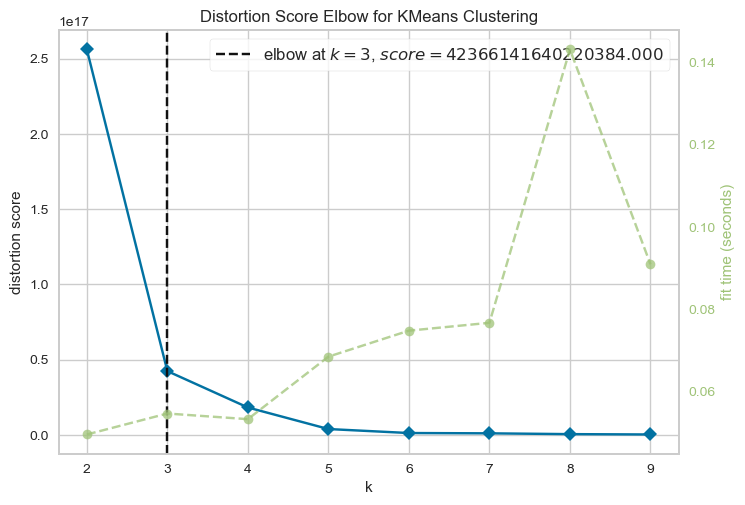

In [77]:
km = KMeans()
vis = KElbowVisualizer(km, k=(2, 10))
vis.fit(x)
vis.show();

In [78]:
model = KMeans(n_clusters=3, random_state=42)

In [79]:
model = model.fit(x)
pred = model.predict(x)

In [80]:
x['Cluster'] = pred

In [81]:
x.sample(20)

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Cluster
43042,3214,8240,1485579.20,5,2,1,8,0
157736,3063,57,5114.16,5,1,1,7,0
93231,3337,26609,9542478.17,4,5,5,14,1
132298,3265,67,9030.26,4,1,1,6,0
121307,3192,18690,2706151.35,5,4,2,11,2
86560,3064,26609,9542478.17,5,5,5,15,1
162565,3041,88,1413.28,5,1,1,7,0
48861,3516,3950,541942.00,3,1,1,5,0
47325,3437,3950,541942.00,3,1,1,5,0
127205,3298,67,9241.98,4,1,1,6,0


In [82]:
silhouette_score(x, pred)

0.8269671096757651